In [61]:
# Import required libraries
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [62]:
# Read the dataset
alzheimers_df = pd.read_csv("alzheimers_disease_data.csv")

# Get general information from the dataset
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64


Distribution of diagnoses:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


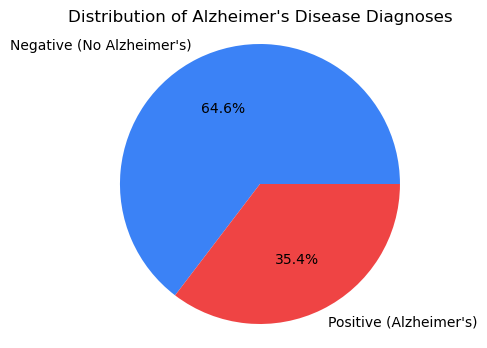

In [63]:
# Check number of positive and negative diagnoses and create pie chart
diagnosis_counts = alzheimers_df["Diagnosis"].value_counts()
print("\nDistribution of diagnoses:")
print(diagnosis_counts)

# Create pie chart
plt.figure(figsize=(5, 4))
plt.pie(diagnosis_counts.values, 
        labels=['Negative (No Alzheimer\'s)', 'Positive (Alzheimer\'s)'],
        autopct='%1.1f%%',
        colors=['#3b82f6', '#ef4444'])
plt.title('Distribution of Alzheimer\'s Disease Diagnoses')
plt.axis('equal')
plt.show()

In [64]:
# Initial data preparation
X = alzheimers_df.drop(columns=["PatientID","DoctorInCharge","Diagnosis"], axis = 1)
y = alzheimers_df["Diagnosis"]

In [65]:
# Create initial train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [66]:
# Scale the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Initial model with base parameters
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

print(f'\nBase Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Base Testing Score: {clf.score(X_test_scaled, y_test)}')


Base Training Score: 1.0
Base Testing Score: 0.9237918215613383


In [68]:
# Get feature importance from initial model and visualize top 10
feature_importances = clf.feature_importances_
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
print("\nFeature Importances:")
for feature in importances_sorted:
    print(feature)


Feature Importances:
(0.18249605600536306, 'FunctionalAssessment')
(0.16088399146799207, 'ADL')
(0.1317430399045045, 'MMSE')
(0.07534045511138242, 'MemoryComplaints')
(0.05005396801300448, 'BehavioralProblems')
(0.0321146134127749, 'DietQuality')
(0.029582789596629203, 'PhysicalActivity')
(0.029184730366065337, 'CholesterolHDL')
(0.029077707691687153, 'CholesterolTriglycerides')
(0.028846853056745978, 'CholesterolLDL')
(0.028670147031272457, 'BMI')
(0.02829617821713515, 'SleepQuality')
(0.0281901891163992, 'AlcoholConsumption')
(0.02811318648538792, 'CholesterolTotal')
(0.025497815128914775, 'SystolicBP')
(0.02403471454195194, 'DiastolicBP')
(0.023638573575917667, 'Age')
(0.01127812038461882, 'EducationLevel')
(0.008124544194704125, 'Ethnicity')
(0.0044083147843093804, 'Gender')
(0.003758557239852796, 'Forgetfulness')
(0.0035959368645839553, 'DifficultyCompletingTasks')
(0.0035951721028162358, 'Diabetes')
(0.003583657901708601, 'Depression')
(0.003580749265231723, 'Smoking')
(0.003497

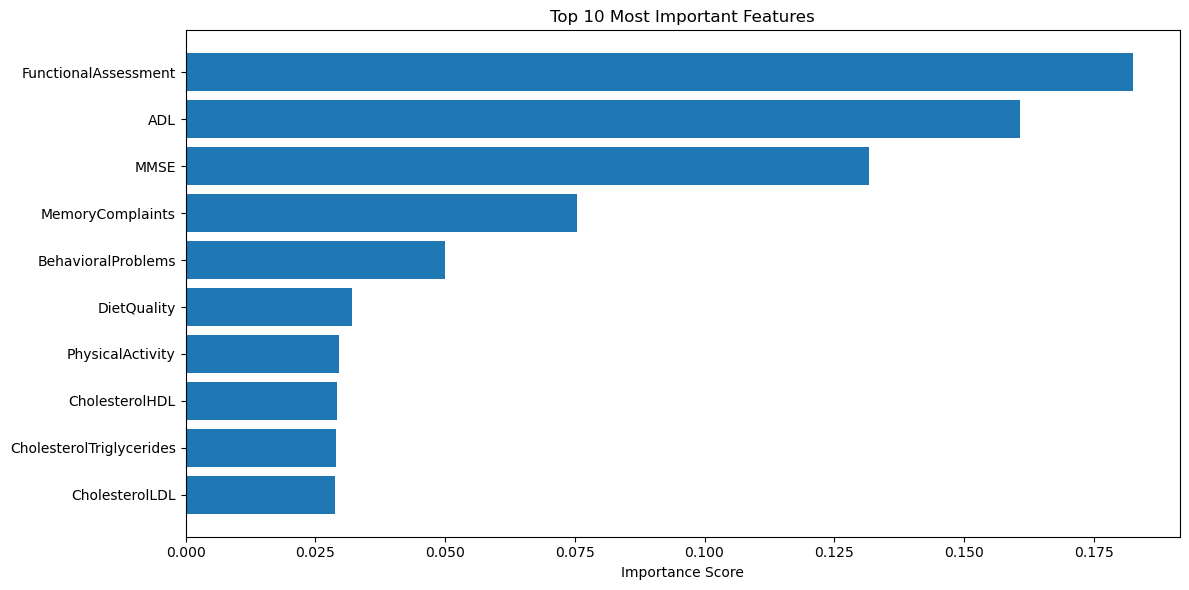

In [69]:
# Create visualization of top 10 features
top_10_features = pd.DataFrame(importances_sorted[:10], columns=['Importance', 'Feature'])

plt.figure(figsize=(12, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at top
plt.tight_layout()
plt.show()


In [55]:
# Grid search for hyperparameter optimization
param_grid = {
    "max_depth": np.arange(5,20),
    "n_estimators": [300,500,1000]
}

rf_model = RandomForestClassifier()
random_clf = RandomizedSearchCV(rf_model, param_grid, verbose=2)
random_clf.fit(X_train_scaled, y_train)

print("\nBest parameters:", random_clf.best_params_)
print("Best score:", random_clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................max_depth=9, n_estimators=500; total time=   0.9s
[CV] END ......................max_depth=9, n_estimators=500; total time=   0.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   0.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   0.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   0.8s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.5s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.5s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.5s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.5s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.5s
[CV] END .....................max_depth=12, n_estimators=500; total time=   0.9s
[CV] END .....................max_depth=12, n_es

In [56]:
# Evaluate model with best parameters
best_clf = RandomForestClassifier(**random_clf.best_params_, random_state=1).fit(X_train_scaled, y_train)
print(f'\nOptimized Training Score: {best_clf.score(X_train_scaled, y_train)}')
print(f'Optimized Testing Score: {best_clf.score(X_test_scaled, y_test)}')


Optimized Training Score: 1.0
Optimized Testing Score: 0.929368029739777


In [57]:
# Print classification report
y_pred = best_clf.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       353
           1       0.93      0.86      0.89       185

    accuracy                           0.93       538
   macro avg       0.93      0.91      0.92       538
weighted avg       0.93      0.93      0.93       538



In [ ]:
param_grid = {
    "max_depth": np.arange(5,20),
    "n_estimators": [300,500,1000]
}

rf_model = RandomForestClassifier()


random_clf = RandomizedSearchCV(rf_model, param_grid, verbose=1)

features = importances_sorted.copy()
score_list = []
while len(features)>10:

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    random_clf.fit(X_train_scaled, y_train)
    print(f"Parameters: {random_clf.best_params_}")
    print(f"Score: {random_clf.best_score_}")

    y_pred = random_clf.predict(X_test_scaled)

    print(f"Recall: {classification_report(y_test,y_pred, output_dict=True)['0']['recall']}")
    print(f"Accuracy: {classification_report(y_test,y_pred, output_dict=True)["accuracy"]}")
    print()
    score_list.append(random_clf.best_score_)

    print("\n\n")
    X=X.drop(columns=features[-1][1])
    print(f"Removing the following column: {features.pop()[1]}")

In [70]:
X = alzheimers_df.drop(columns=["PatientID","DoctorInCharge","Diagnosis","HeadInjury","PersonalityChanges", 
                                "Confusion", "Disorientation", "Hypertension", "CardiovascularDisease","FamilyHistoryAlzheimers"], axis = 1)
y = alzheimers_df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
optimized_clf = RandomForestClassifier(n_estimators=1000, max_depth=13)
optimized_clf.fit(X_train_scaled, y_train)

print(f'Final Training Score: {optimized_clf.score(X_train_scaled, y_train)}')
print(f'Final Testing Score: {optimized_clf.score(X_test_scaled, y_test)}')

Final Training Score: 1.0
Final Testing Score: 0.9349442379182156


In [72]:
# Print classification report
y_pred = optimized_clf.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       347
           1       0.95      0.86      0.90       191

    accuracy                           0.93       538
   macro avg       0.94      0.92      0.93       538
weighted avg       0.94      0.93      0.93       538



In [42]:
# Age group analysis
def create_age_groups(age):
    if age < 65:
        return '60-64'
    elif age < 70:
        return '65-69'
    elif age < 75:
        return '70-74'
    elif age < 80:
        return '75-79'
    elif age < 85:
        return '80-84'
    else:
        return '85+'

# Add age group column
alzheimers_df['AgeGroup'] = alzheimers_df['Age'].apply(create_age_groups)

# Get unique age groups
age_groups = sorted(alzheimers_df['AgeGroup'].unique())

<Figure size 1500x600 with 0 Axes>

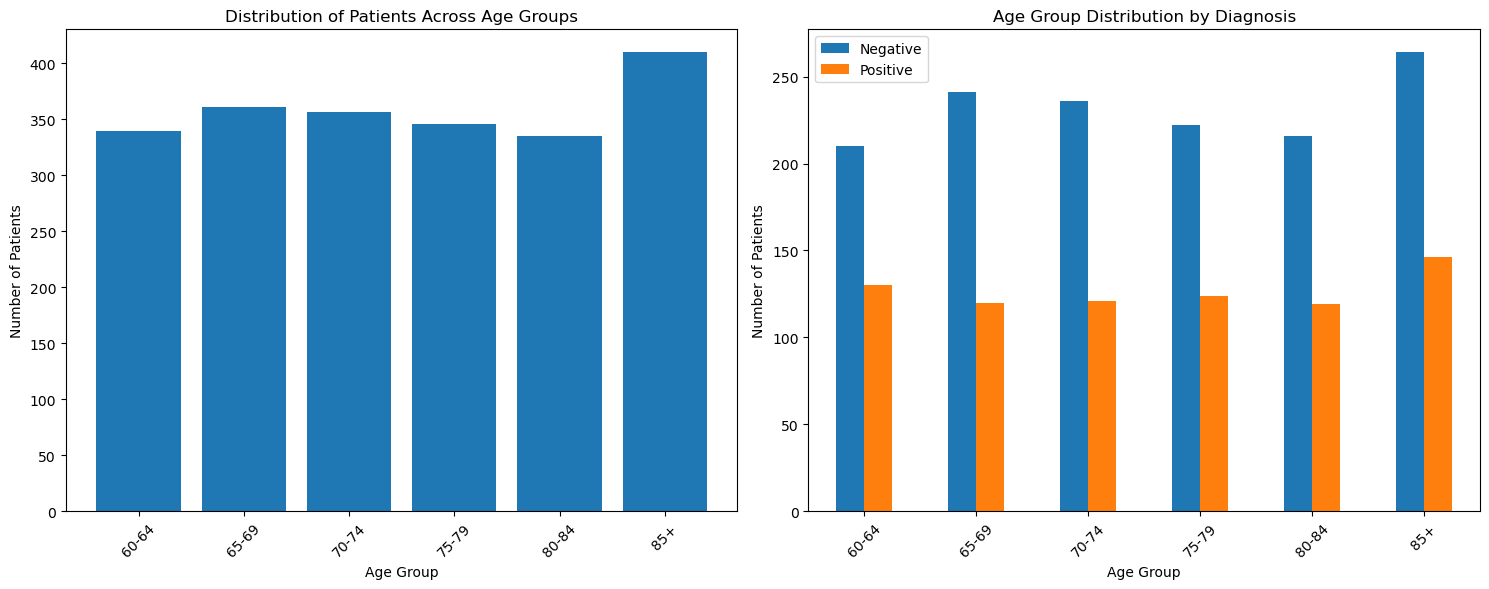


Numerical Summary of Age Groups:

Overall Distribution:
AgeGroup
60-64    340
65-69    361
70-74    357
75-79    346
80-84    335
85+      410
Name: count, dtype: int64

Distribution by Diagnosis:
Diagnosis    0    1
AgeGroup           
60-64      210  130
65-69      241  120
70-74      236  121
75-79      222  124
80-84      216  119
85+        264  146

Percentage Distribution within each Age Group:
Diagnosis     0     1
AgeGroup             
60-64      61.8  38.2
65-69      66.8  33.2
70-74      66.1  33.9
75-79      64.2  35.8
80-84      64.5  35.5
85+        64.4  35.6


In [50]:
# Create visualizations for age group distribution
plt.figure(figsize=(15, 6))

# Plot 1: Overall Age Group Distribution
age_counts = alzheimers_df['AgeGroup'].value_counts().sort_index()
age_diagnosis = alzheimers_df.groupby('AgeGroup')['Diagnosis'].value_counts().unstack()

# Create the bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First subplot - Overall distribution
ax1.bar(age_counts.index, age_counts.values)
ax1.set_title('Distribution of Patients Across Age Groups')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Patients')
ax1.tick_params(axis='x', rotation=45)

# Second subplot - Distribution by diagnosis
age_diagnosis.plot(kind='bar', ax=ax2)
ax2.set_title('Age Group Distribution by Diagnosis')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Number of Patients')
ax2.legend(['Negative', 'Positive'])
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print numerical summary
print("\nNumerical Summary of Age Groups:")
print("\nOverall Distribution:")
print(age_counts)
print("\nDistribution by Diagnosis:")
print(age_diagnosis)

# Calculate percentages within each age group
age_percentages = (age_diagnosis.div(age_diagnosis.sum(axis=1), axis=0) * 100).round(1)
print("\nPercentage Distribution within each Age Group:")
print(age_percentages)

In [53]:
# Function to evaluate model performance for a specific age group
def evaluate_age_group(df, age_group):
    # Filter data for age group
    group_data = df[df['AgeGroup'] == age_group]
    
    # Prepare features
    X_group = group_data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis', 'AgeGroup'])
    y_group = group_data['Diagnosis']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_group, y_group, random_state=6)
    
    # Scale features
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Use best parameters from overall model
    clf = RandomForestClassifier(**random_clf.best_params_, random_state=1)
    clf.fit(X_train_scaled, y_train)
    
    # Get predictions
    y_pred = clf.predict(X_test_scaled)
   
    
    # Calculate metrics
    metrics = classification_report(y_test, y_pred, output_dict=True)
    
    return {
        'accuracy': metrics['accuracy'],
        'precision': metrics['1']['precision'] if '1' in metrics else 0,
        'recall': metrics['1']['recall'] if '1' in metrics else 0,
        'f1': metrics['1']['f1-score'] if '1' in metrics else 0,
        'support': len(y_test)
      
    }

In [44]:
# Evaluate each age group
age_performance = {}

for group in age_groups:
    print(f"Processing age group: {group}")
    age_performance[group] = evaluate_age_group(alzheimers_df, group)

# Convert results to DataFrame for easy viewing
age_performance_df = pd.DataFrame.from_dict(age_performance, orient='index')
age_performance_df = age_performance_df.sort_index()

# Display results
print("\nModel Performance by Age Group:")
print(age_performance_df)

Processing age group: 60-64
Processing age group: 65-69
Processing age group: 70-74
Processing age group: 75-79
Processing age group: 80-84
Processing age group: 85+

Model Performance by Age Group:
       accuracy  precision    recall        f1  support
60-64  0.764706   0.818182  0.529412  0.642857       85
65-69  0.780220   0.882353  0.454545  0.600000       91
70-74  0.877778   1.000000  0.633333  0.775510       90
75-79  0.816092   0.947368  0.545455  0.692308       87
80-84  0.869048   0.952381  0.666667  0.784314       84
85+    0.854369   0.888889  0.744186  0.810127      103


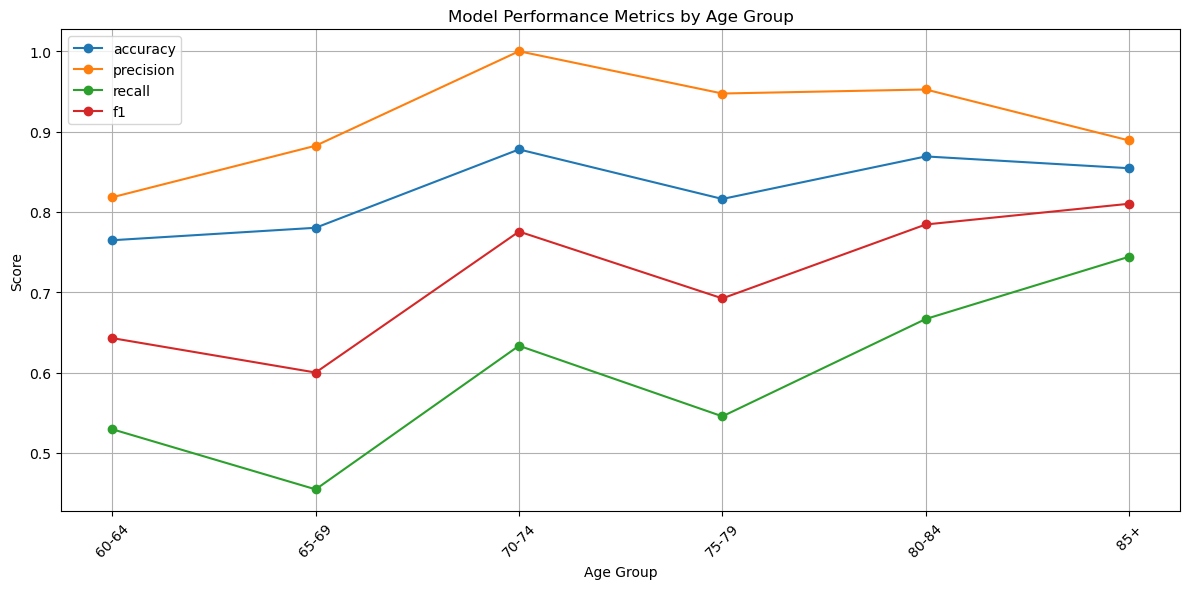


Distribution of Cases by Age Group:
Diagnosis    0    1
AgeGroup           
60-64      210  130
65-69      241  120
70-74      236  121
75-79      222  124
80-84      216  119
85+        264  146


In [45]:
# Visualize results
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    plt.plot(age_performance_df.index, age_performance_df[metric], marker='o', label=metric)

plt.xlabel('Age Group')
plt.ylabel('Score')
plt.title('Model Performance Metrics by Age Group')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of cases in each age group
age_distribution = alzheimers_df.groupby(['AgeGroup', 'Diagnosis']).size().unstack()
print("\nDistribution of Cases by Age Group:")
print(age_distribution)

In [46]:
# Analyze feature importance by age group
def analyze_feature_importance_by_age(df, age_group):
    group_data = df[df['AgeGroup'] == age_group]
    X_group = group_data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis', 'AgeGroup'])
    y_group = group_data['Diagnosis']
    
    # Train model on full age group data
    scaler = StandardScaler().fit(X_group)
    X_scaled = scaler.transform(X_group)
    
    clf = RandomForestClassifier(**random_clf.best_params_, random_state=1)
    clf.fit(X_scaled, y_group)
    
    # Get feature importance
    importance = pd.DataFrame({
        'feature': X_group.columns,
        'importance': clf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return importance.head(5)  # Return top 5 features

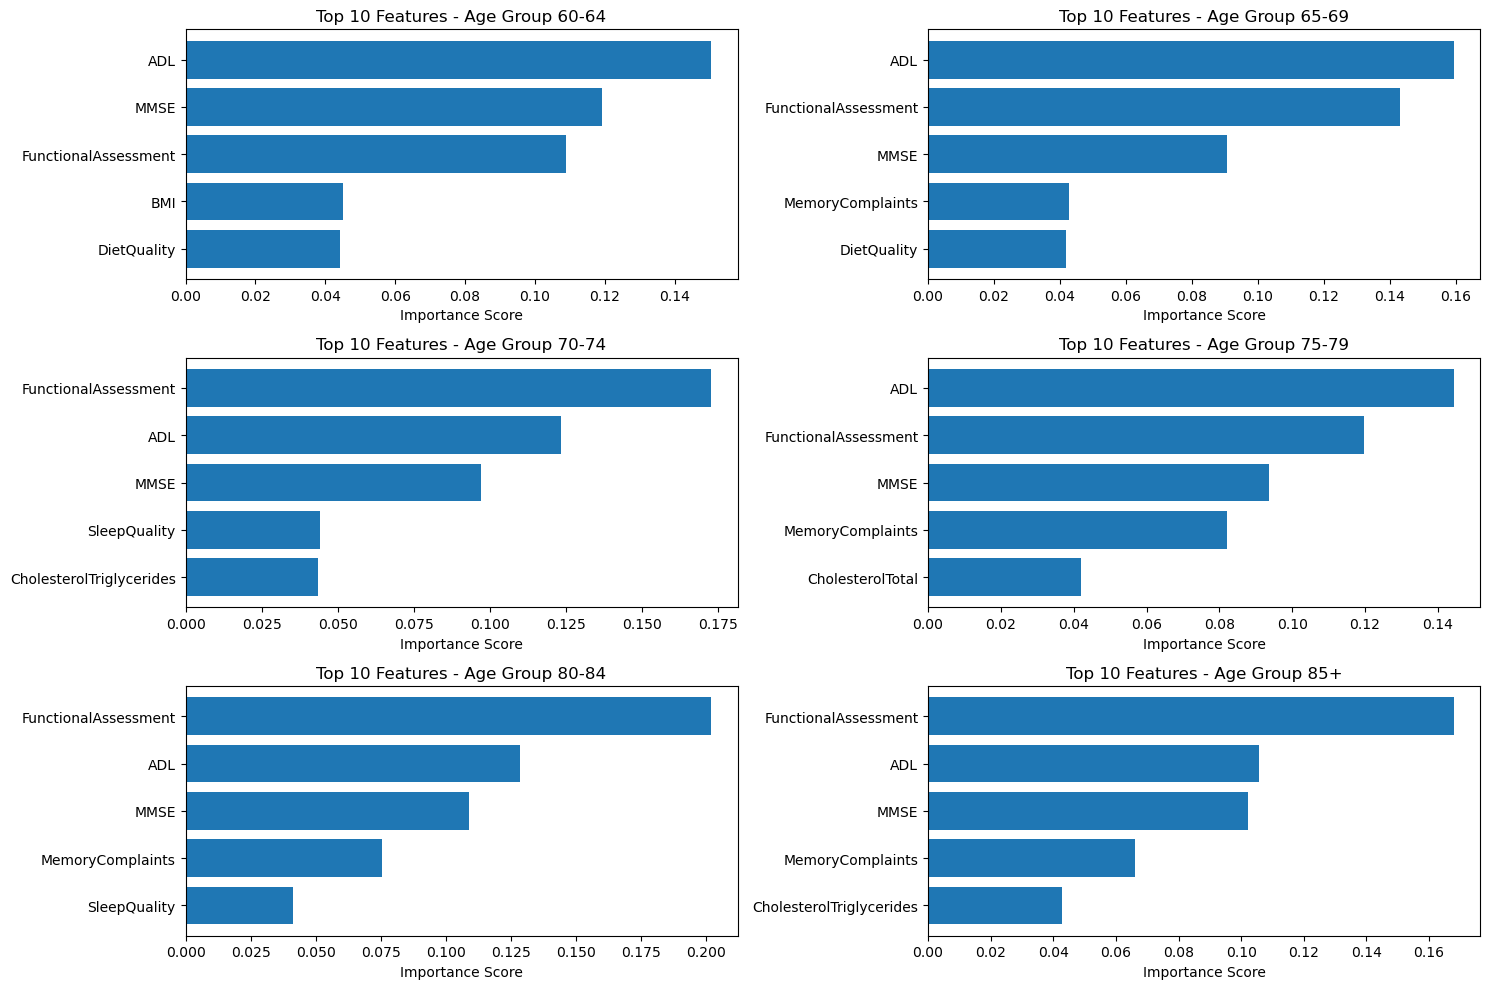

In [47]:
# Analyze and visualize feature importance for each age group
plt.figure(figsize=(15, 10))
n_groups = len(age_groups)
n_cols = 2
n_rows = (n_groups + 1) // 2

for idx, group in enumerate(age_groups, 1):
    plt.subplot(n_rows, n_cols, idx)
    
    # Get importance data
    importance_df = analyze_feature_importance_by_age(alzheimers_df, group)
    top_10 = importance_df.head(10)
    
    # Create horizontal bar plot
    plt.barh(top_10['feature'], top_10['importance'])
    plt.title(f'Top 10 Features - Age Group {group}')
    plt.xlabel('Importance Score')
    
    # Adjust layout to prevent label cutoff
    plt.gca().invert_yaxis()  # Show highest importance at top

plt.tight_layout()
plt.show()



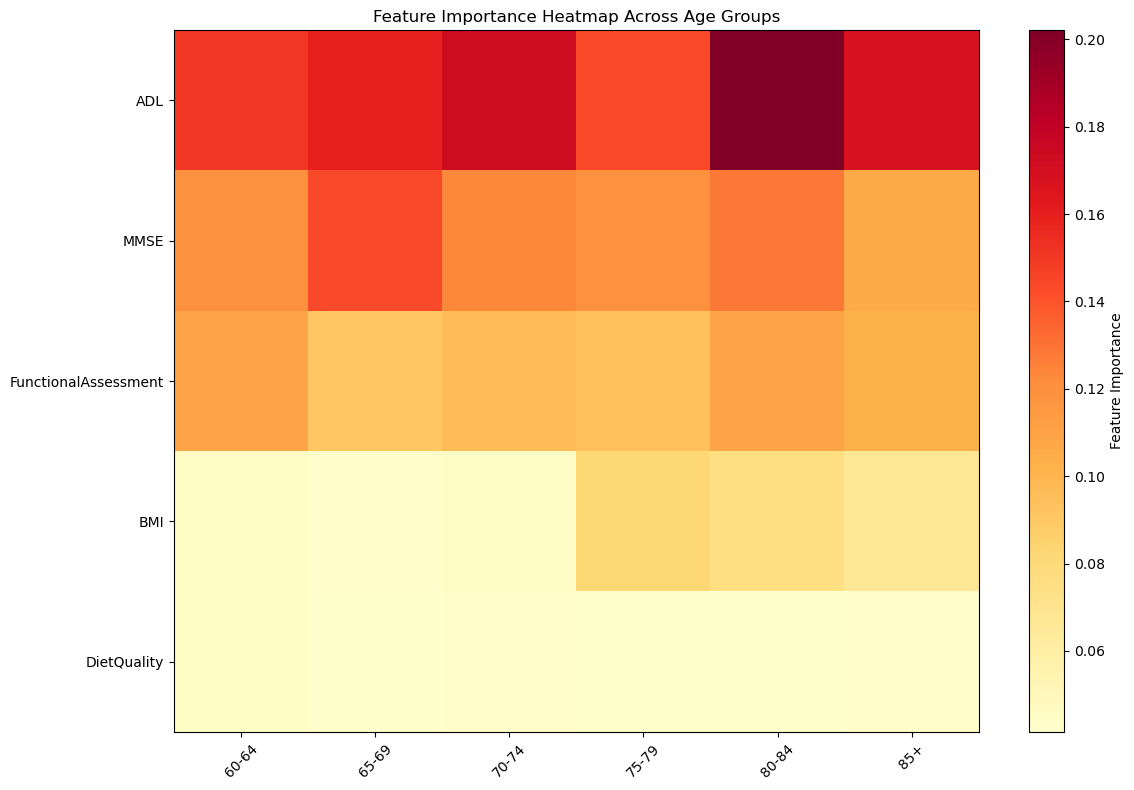

In [48]:
# Create a heatmap of top 10 features across age groups
top_features_by_age = pd.DataFrame()

for group in age_groups:
    importance_df = analyze_feature_importance_by_age(alzheimers_df, group)
    top_features_by_age[group] = importance_df.head(10)['importance'].values

top_features_by_age.index = analyze_feature_importance_by_age(alzheimers_df, age_groups[0]).head(10)['feature'].values

plt.figure(figsize=(12, 8))
plt.imshow(top_features_by_age, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Feature Importance')
plt.xticks(range(len(age_groups)), age_groups, rotation=45)
plt.yticks(range(len(top_features_by_age.index)), top_features_by_age.index)
plt.title('Feature Importance Heatmap Across Age Groups')
plt.tight_layout()
plt.show()